In [1]:
import numpy as np
import pandas as pd
import io

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving Sales_Data.xlsx to Sales_Data.xlsx


In [4]:
data = pd.read_excel(io.BytesIO(uploaded[next(iter(uploaded))]))


In [5]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [6]:
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 2747 rows and 20 columns.


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [8]:
data.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
DAYS_SINCE_LASTORDER,0
STATUS,0
PRODUCTLINE,0
MSRP,0


# **Summary Statistics**

In [9]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
ORDERNUMBER,2747.0,10259.761558,10100.0,10181.0,10264.0,10334.5,10425.0,91.877521
QUANTITYORDERED,2747.0,35.103021,6.0,27.0,35.0,43.0,97.0,9.762135
PRICEEACH,2747.0,101.098951,26.88,68.745,95.55,127.1,252.87,42.042548
ORDERLINENUMBER,2747.0,6.491081,1.0,3.0,6.0,9.0,18.0,4.230544
SALES,2747.0,3553.047583,482.13,2204.35,3184.8,4503.095,14082.8,1838.953901
ORDERDATE,2747,2019-05-13 21:56:17.211503360,2018-01-06 00:00:00,2018-11-08 00:00:00,2019-06-24 00:00:00,2019-11-17 00:00:00,2020-05-31 00:00:00,NaN
DAYS_SINCE_LASTORDER,2747.0,1757.085912,42.0,1077.0,1761.0,2436.5,3562.0,819.280576
MSRP,2747.0,100.691664,33.0,68.0,99.0,124.0,214.0,40.114802


#Univariate Analysis

# Numerical Feature Distributions

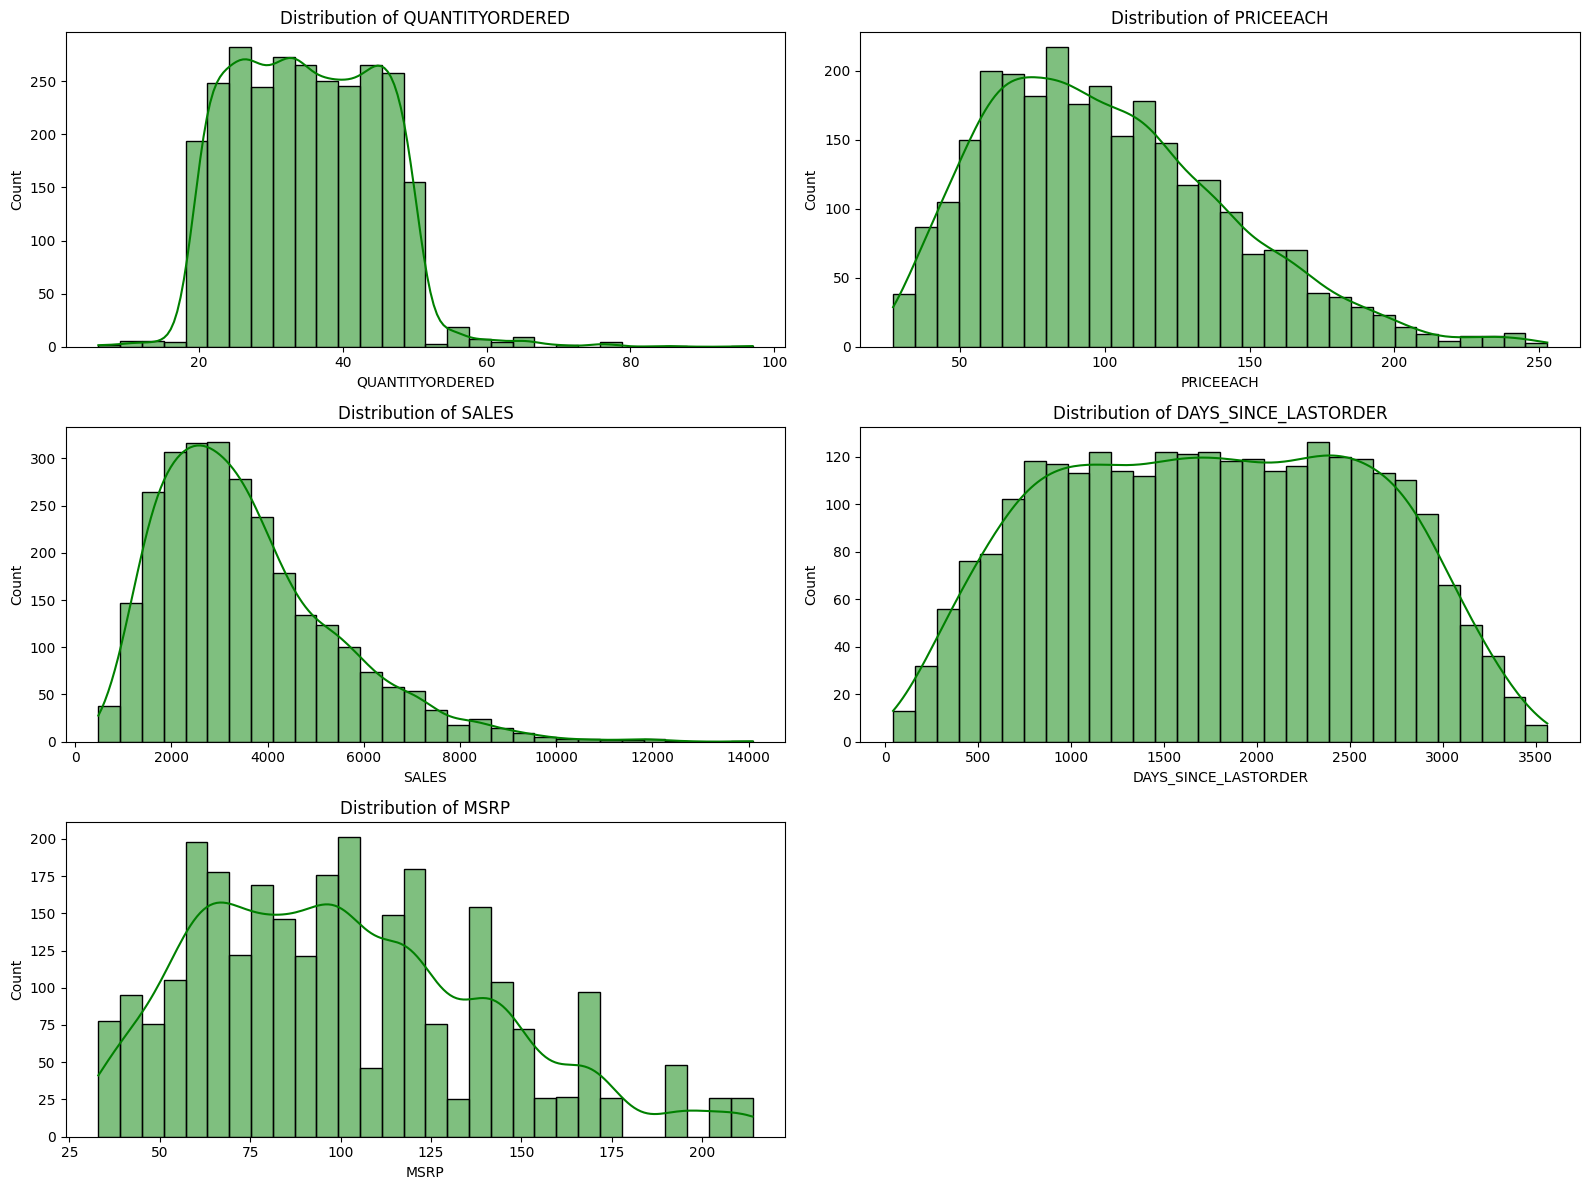

In [10]:
# ----------- Numerical Feature Distributions --------
num_cols = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'DAYS_SINCE_LASTORDER', 'MSRP']

plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[col], kde=True, bins=30, color='green')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# **Categorical Feature Counts**

<ipython-input-11-1797352286>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")
<ipython-input-11-1797352286>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")
<ipython-input-11-1797352286>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")
<ipython-input-11-1797352286>:7: FutureWarning: 

Passing `palette` without ass

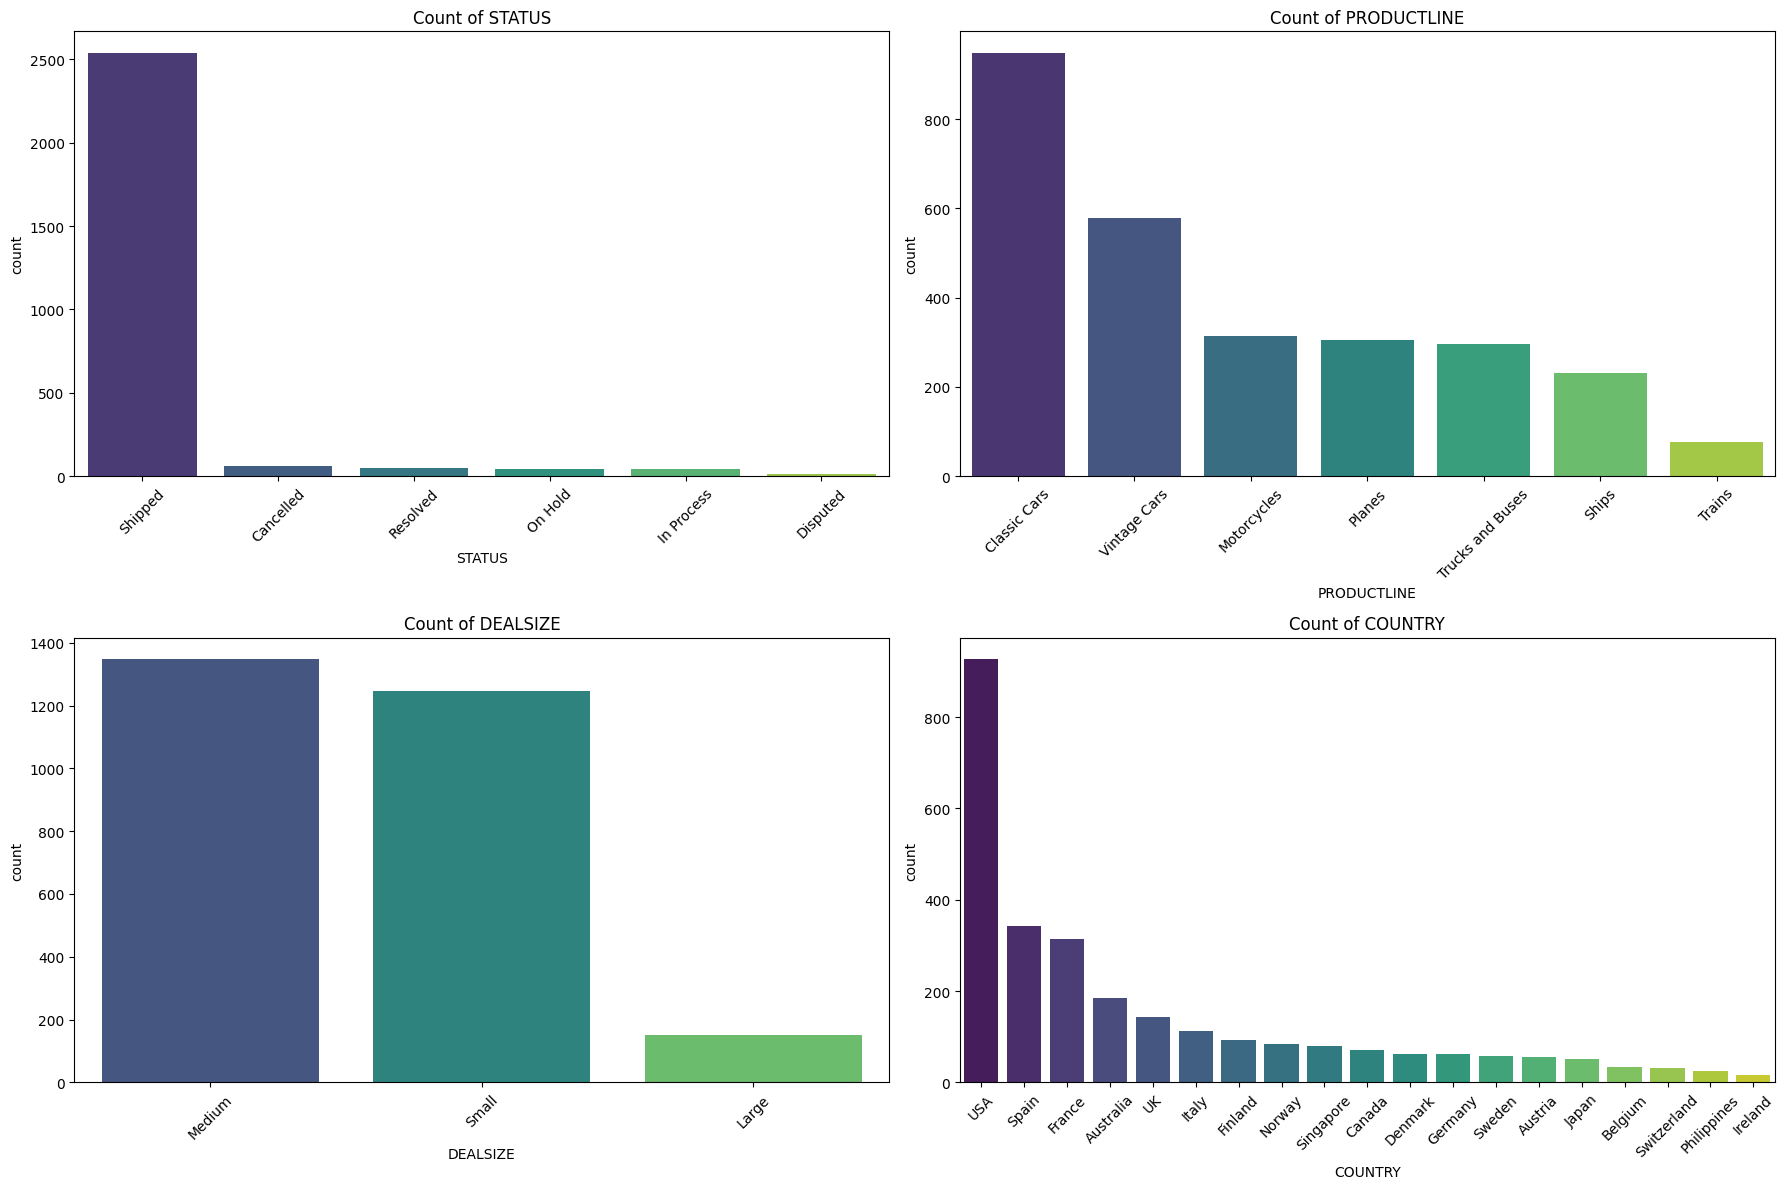

In [11]:
# ----------- Categorical Feature Counts ------------
cat_cols = ['STATUS', 'PRODUCTLINE', 'DEALSIZE', 'COUNTRY']

plt.figure(figsize=(18, 12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bivariate Analysis

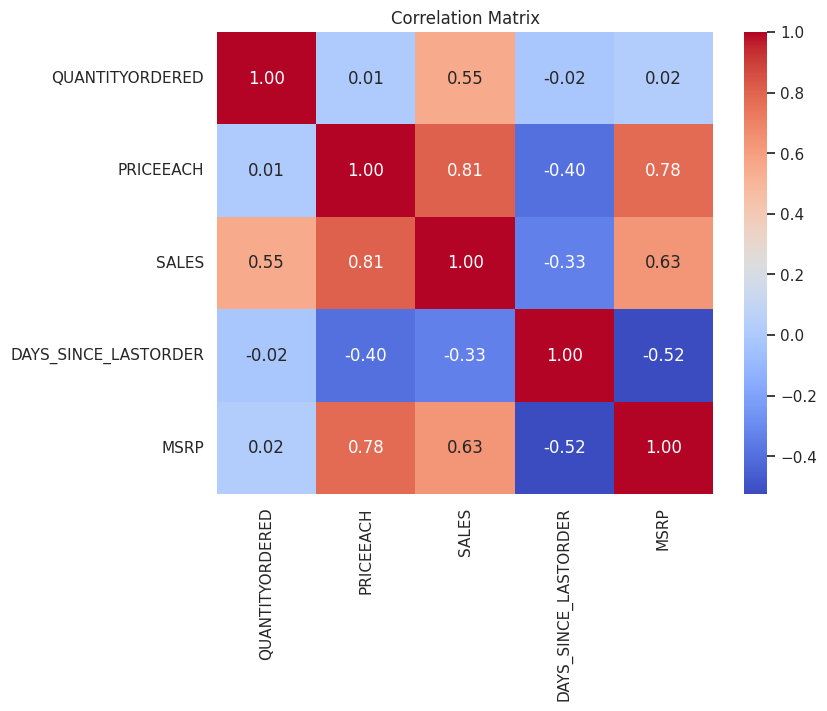

In [12]:
# Set plot style
sns.set(style="whitegrid")

# ---------- Correlation Heatmap ----------
plt.figure(figsize=(8, 6))
corr = data[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'DAYS_SINCE_LASTORDER', 'MSRP']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Sales vs. Product Line

<ipython-input-13-2635640241>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PRODUCTLINE', y='SALES', data=data, palette='Set2')


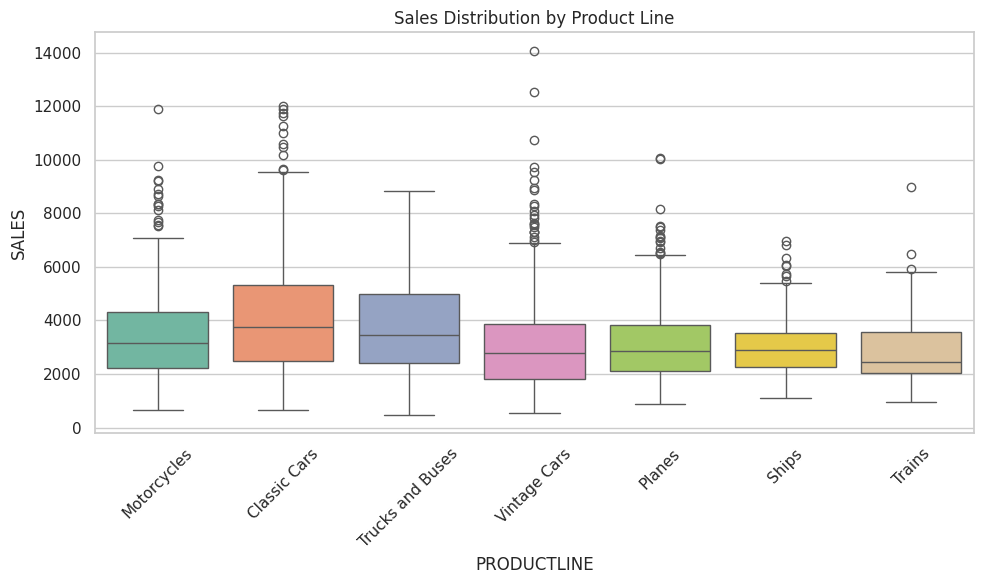

In [13]:
# ---------- Sales vs. Product Line ----------
plt.figure(figsize=(10, 6))
sns.boxplot(x='PRODUCTLINE', y='SALES', data=data, palette='Set2')
plt.title('Sales Distribution by Product Line')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Sales vs. Deal Size

<ipython-input-14-454906934>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEALSIZE', y='SALES', data=data, palette='pastel')


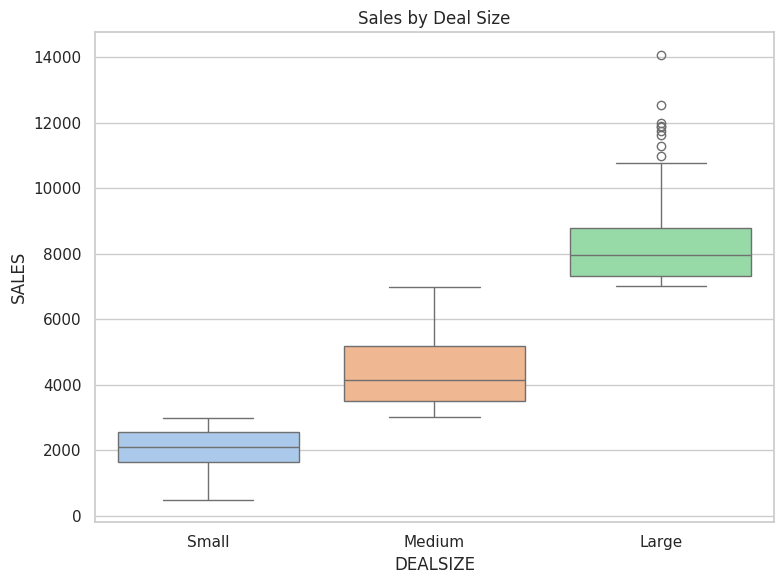

In [14]:
# ---------- Sales vs. Deal Size ----------
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEALSIZE', y='SALES', data=data, palette='pastel')
plt.title('Sales by Deal Size')
plt.tight_layout()
plt.show()

Sales vs. Quantity Ordered

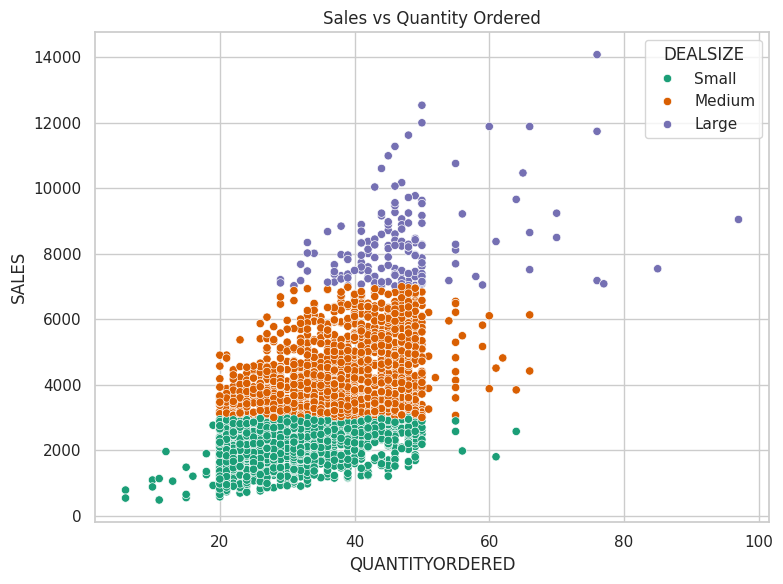

In [15]:
# ---------- Sales vs. Quantity Ordered ----------
plt.figure(figsize=(8, 6))
sns.scatterplot(x='QUANTITYORDERED', y='SALES', data=data, hue='DEALSIZE', palette='Dark2')
plt.title('Sales vs Quantity Ordered')
plt.tight_layout()
plt.show()

Price vs MSRP

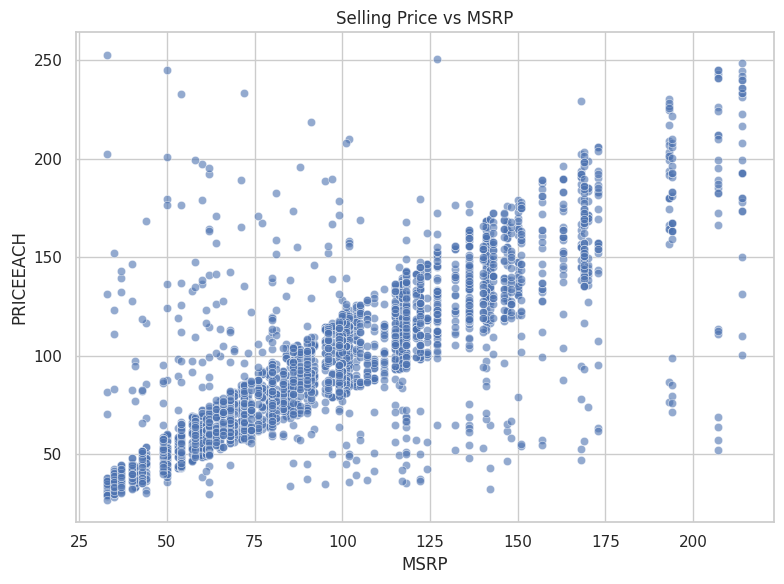

In [16]:
# ---------- Price vs MSRP ----------
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MSRP', y='PRICEEACH', data=data, alpha=0.6)
plt.title('Selling Price vs MSRP')
plt.tight_layout()
plt.show()

Average Sales per Country

<ipython-input-17-4129846172>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.index, y=country_sales.values, palette='cool')


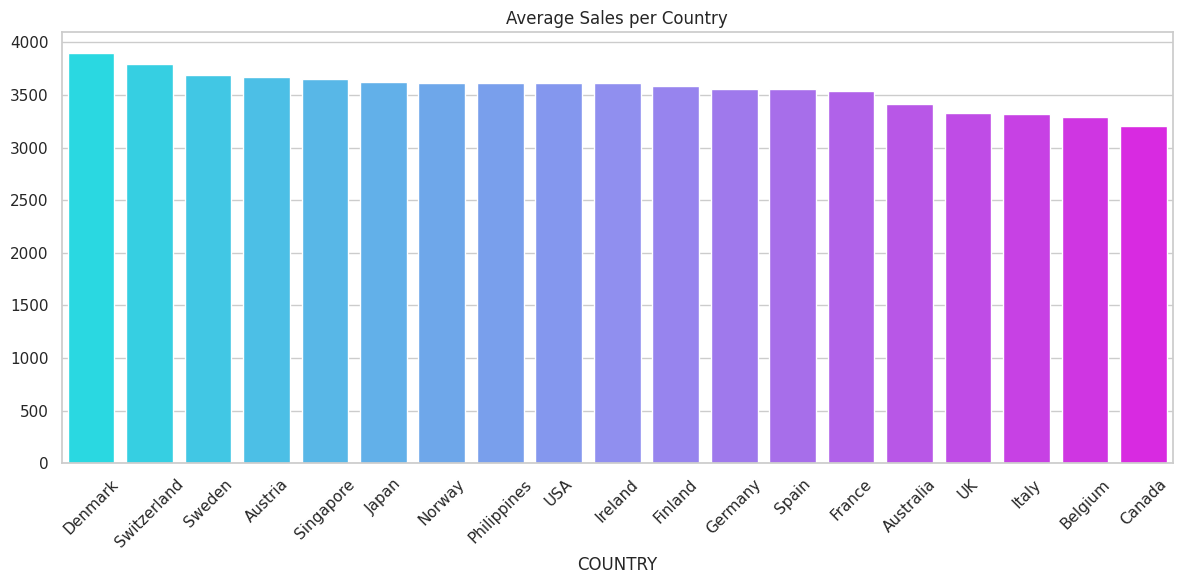

In [17]:
# ---------- Average Sales per Country ----------
country_sales = data.groupby('COUNTRY')['SALES'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=country_sales.index, y=country_sales.values, palette='cool')
plt.title('Average Sales per Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Multivariate Analysis

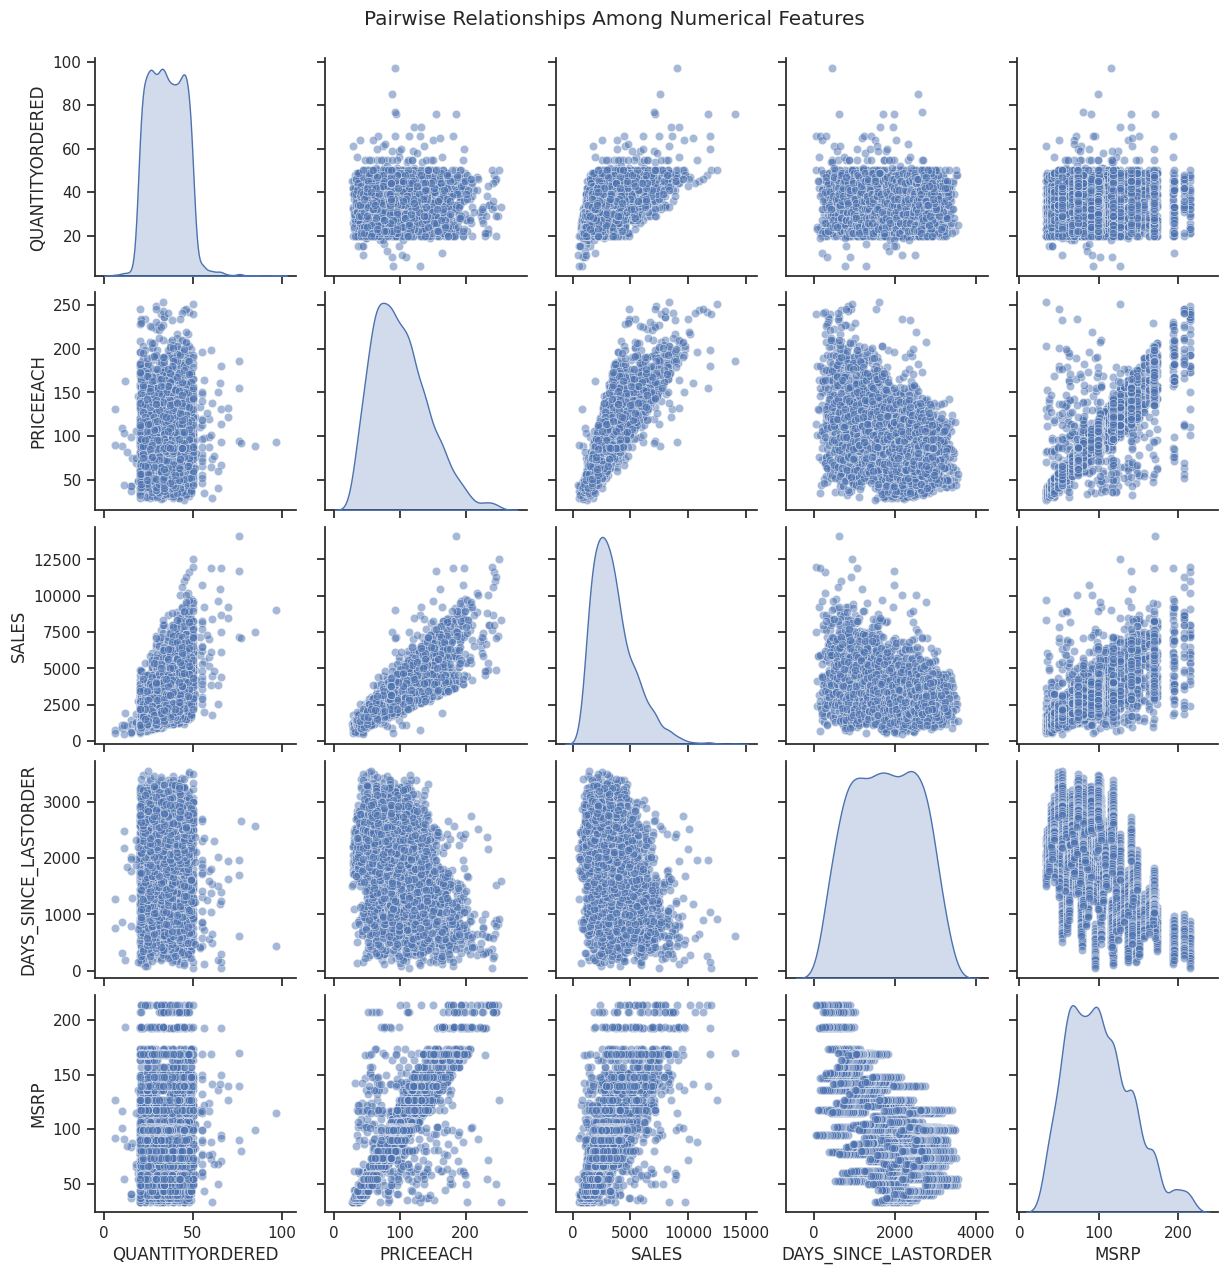

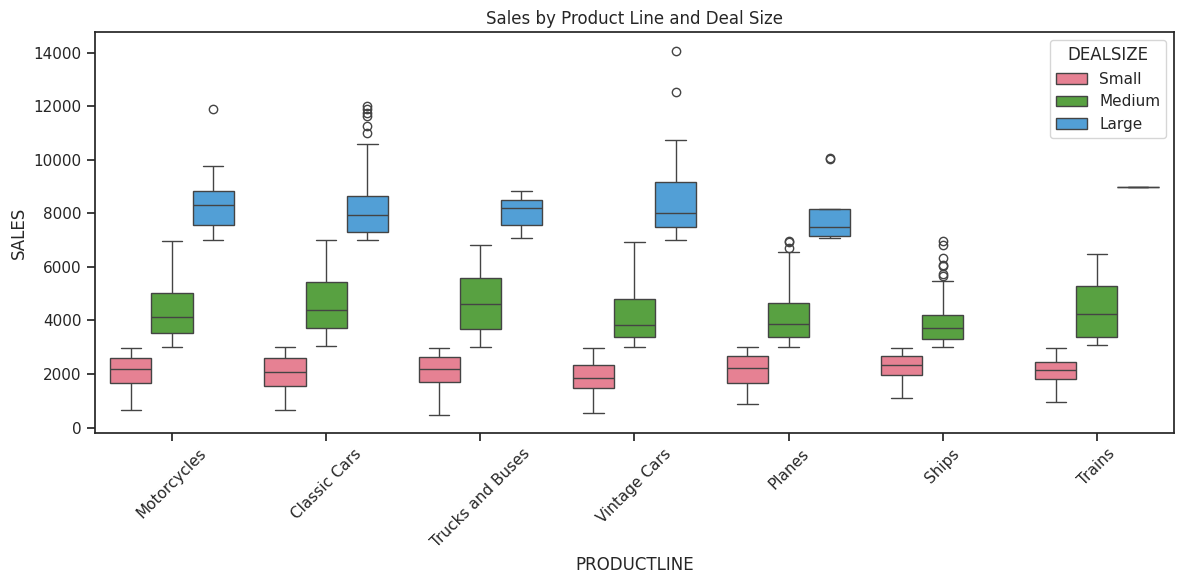

<ipython-input-18-3600828855>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='COUNTRY', y='SALES', hue='PRODUCTLINE', estimator=sum, ci=None)


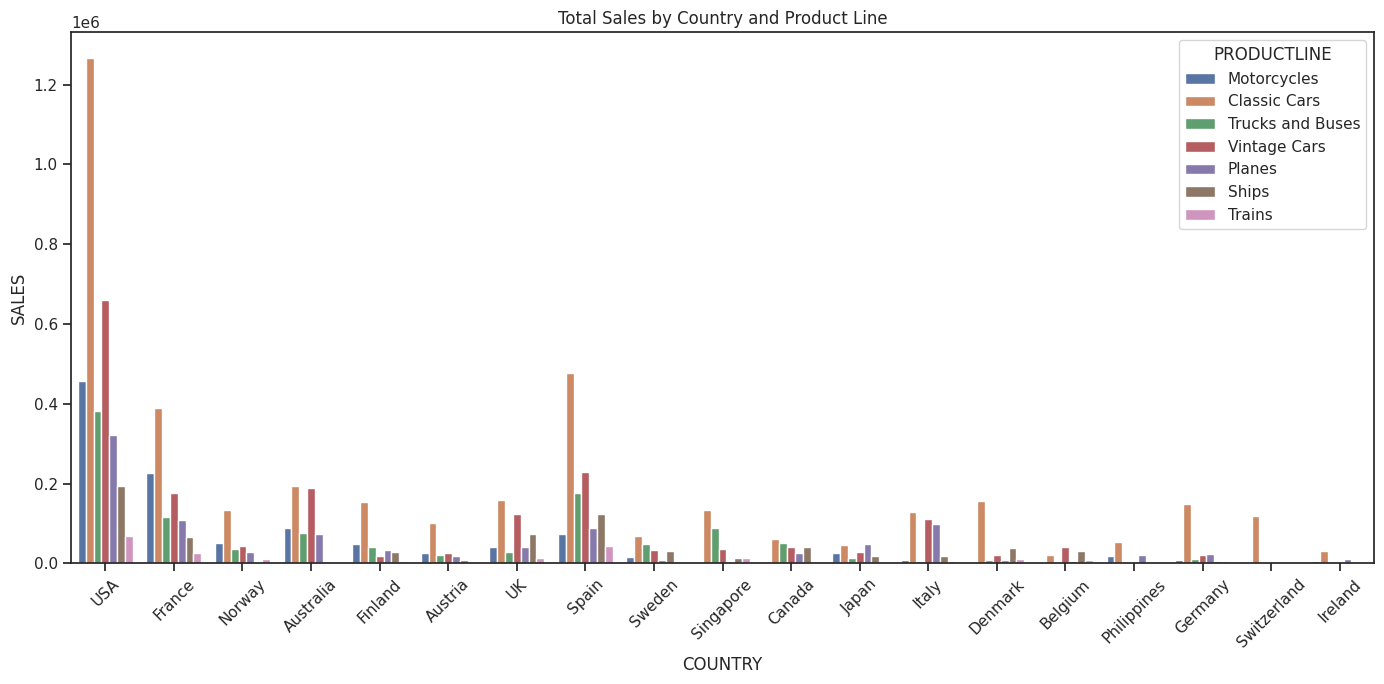

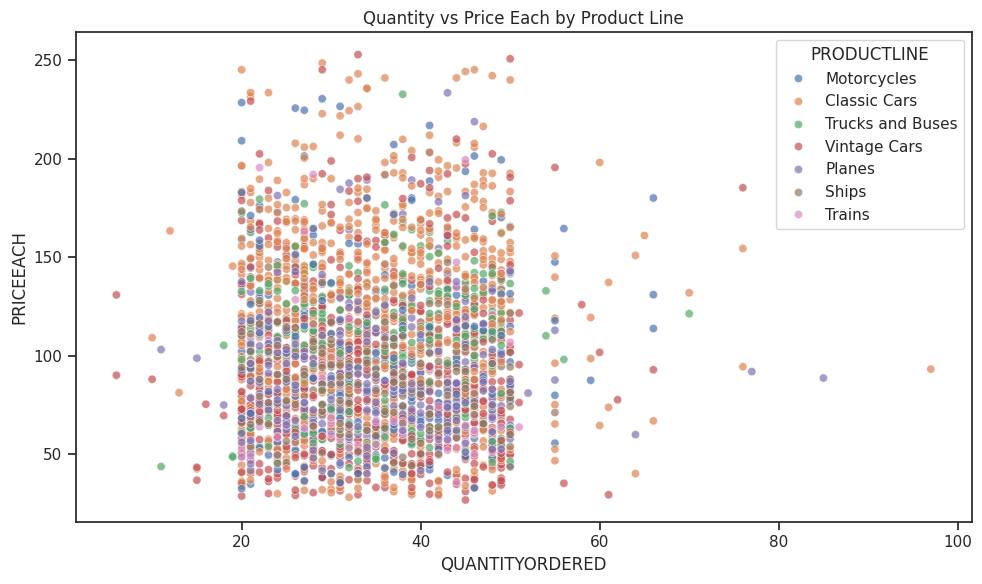

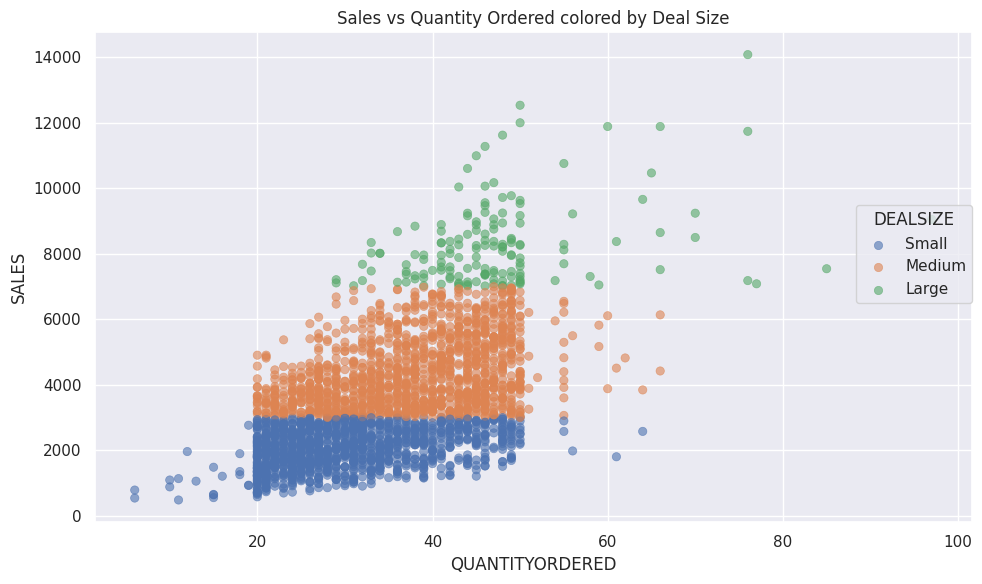

In [18]:
# Set style
sns.set(style="ticks")

# ------------ Pair Plot (Numerical Features) ------------
sns.pairplot(data[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'DAYS_SINCE_LASTORDER', 'MSRP']],
             kind='scatter', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairwise Relationships Among Numerical Features', y=1.02)
plt.show()

# ------------ Sales by Product Line and Deal Size ------------
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='PRODUCTLINE', y='SALES', hue='DEALSIZE', palette='husl')
plt.title('Sales by Product Line and Deal Size')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ------------ Sales by Country and Product Line ------------
plt.figure(figsize=(14, 7))
sns.barplot(data=data, x='COUNTRY', y='SALES', hue='PRODUCTLINE', estimator=sum, ci=None)
plt.title('Total Sales by Country and Product Line')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ------------ Quantity vs Price with Product Line ------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='QUANTITYORDERED', y='PRICEEACH', hue='PRODUCTLINE', alpha=0.7)
plt.title('Quantity vs Price Each by Product Line')
plt.tight_layout()
plt.show()

# ------------ 3D-like Insight: Sales vs Quantity and MSRP (colored by Deal Size) ------------
import seaborn.objects as so

(
    so.Plot(data, x="QUANTITYORDERED", y="SALES", color="DEALSIZE")
    .add(so.Dot(alpha=0.6))
    .layout(size=(10, 6))
    .label(title="Sales vs Quantity Ordered colored by Deal Size")
    .show()
)

# Time-Based Sales Trends

<ipython-input-19-4086182915>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quarterly_sales, x='Quarter', y='SALES', palette='Blues_d')
<ipython-input-19-4086182915>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_sales, x='Year', y='SALES', palette='Greens_d')


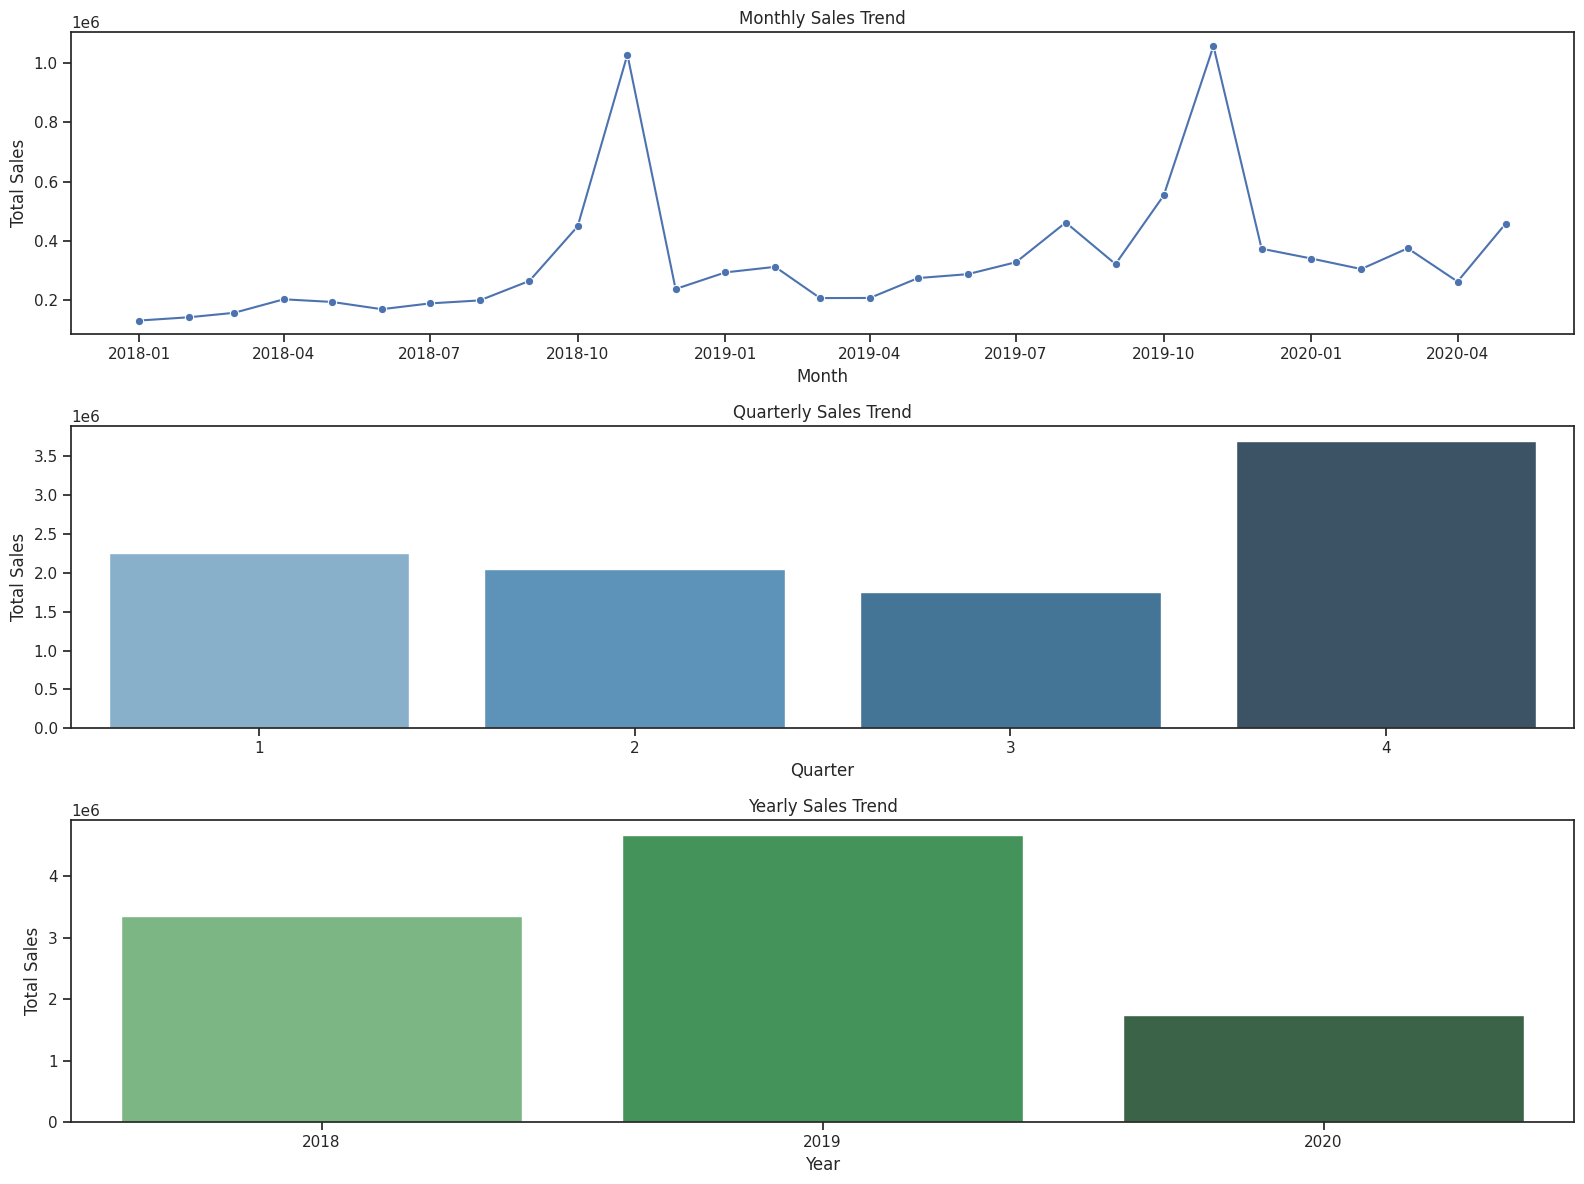

In [19]:
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])
data['Year'] = data['ORDERDATE'].dt.year
data['Month'] = data['ORDERDATE'].dt.month
data['Quarter'] = data['ORDERDATE'].dt.quarter
data['Week'] = data['ORDERDATE'].dt.isocalendar().week

# Monthly Sales Trend
monthly_sales = data.groupby(data['ORDERDATE'].dt.to_period('M'))['SALES'].sum().reset_index()
monthly_sales['ORDERDATE'] = monthly_sales['ORDERDATE'].dt.to_timestamp()

# Quarterly Sales Trend
quarterly_sales = data.groupby('Quarter')['SALES'].sum().reset_index()
quarterly_sales['Quarter'] = quarterly_sales['Quarter'].astype(str)

# Yearly Sales Trend
yearly_sales = data.groupby('Year')['SALES'].sum().reset_index()

# Plotting
plt.figure(figsize=(16, 12))

# Monthly Trend
plt.subplot(3, 1, 1)
sns.lineplot(data=monthly_sales, x='ORDERDATE', y='SALES', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Quarterly Trend
plt.subplot(3, 1, 2)
sns.barplot(data=quarterly_sales, x='Quarter', y='SALES', palette='Blues_d')
plt.title('Quarterly Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')

# Yearly Trend
plt.subplot(3, 1, 3)
sns.barplot(data=yearly_sales, x='Year', y='SALES', palette='Greens_d')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()


Key Observations (Based on trends you would observe from above charts):

Monthly Peaks: Likely spikes in Q4 (Oct–Dec), consistent with B2B or consumer seasonal demand.

Quarterly Growth: If observed, Q3/Q4 often outperform Q1 — useful for marketing calendar planning.

Weekly Patterns: Sales may cluster on certain weeks/months — helps optimize promotional timing.

